<a href="https://colab.research.google.com/github/YashNigam65/gitfolder/blob/master/notebook/Other/pima_indians_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation: Correlation measures the strength and direction of a linear relationship between two variables. If two variables are correlated, it means that as one variable changes, the other variable tends to change in a consistent way. For example, height and weight are often positively correlated: taller people tend to weigh more.

Key takeaway: Correlation indicates that two variables move together, but it doesn't tell you why they move together, or if one causes the other.

Correlation analysis itself is not a supervised, unsupervised, regression, or classification algorithm. Instead, it's a statistical method used primarily in Exploratory Data Analysis (EDA) to understand the relationships between variables.

In [2]:
# Statistical Summary
from pandas import read_csv
import matplotlib
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
%matplotlib inline

# %matplotlib inline:It is is a magic command, Its purpose is to ensure that plots generated by
# the Matplotlib library are displayed directly within the output cells of the notebook

# read csv

In [10]:
filename = "pima_indians_dataset.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = read_csv('https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians-diabetes.csv', names = names)
pima = pima.iloc[9:]

#set_option('display.width', 100)
#set_option('precision', 3)

# display data

In [11]:
pima

,preg,plas,pres,skin,test,mass,pedi,age,class
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


# descriptive or summary statistics

pima.describe(): This method calculates and displays descriptive statistics for the numerical columns in your DataFrame. It doesn't show the raw data, but rather a summary of its key characteristics. For each numerical column, it typically provides:

count: The number of non-null values.
mean: The average value.
std: The standard deviation (a measure of data spread).
min: The smallest value.
25% (Q1): The first quartile (25th percentile).
50% (Q2): The median (50th percentile).
75% (Q3): The third quartile (75th percentile).
max: The largest value.

In [12]:
description = pima.describe()
description

,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's check the data types of the `pima` DataFrame to confirm why 'preg' was excluded from `describe()`.

In [13]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 9 to 776
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    object 
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    float64
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


preg is coming as object that's y it is ignored by describe function, if you want you need to first convert it into float64 then use describe command

In [14]:
pima.shape
pima.groupby('class').size()

,0
class,
0.0,500
1.0,268


# finding correlation between variables - between independent variables and dependent variable and among independent variables

In [ ]:
pima.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


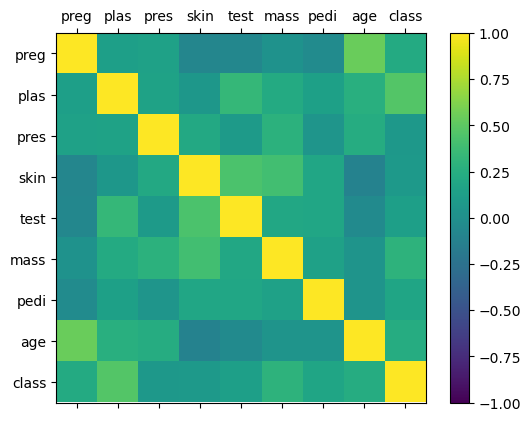

In [ ]:
correlations = pima.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=+1)
fig.colorbar(cax)
pyplot.show()

In [ ]:
scatter_matrix(data)
pyplot.show()

# measuring skewness

In [ ]:
data.skew()

# measuring kurtosis

In [ ]:
data.kurt()